<a href="https://colab.research.google.com/github/SashankKantamsetti/ANN-LSTM-Reservoir-Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd

# Load data from Excel file
df = pd.read_excel("/content/Nagarjuna Sagar.xlsx")

# Ensure 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dropna(inplace=True)
# Set 'Date' as the index
df.set_index("Date", inplace=True)

# Remove rows where 'Level' is between 200 and 800
df = df[(df['Level'] >= 400) & (df['Level'] <= 700)]

# Check the resulting dataframe
df.head()


,Level,Storage,Inflow,Outflow
Date,,,,
2005-10-01,590.0,408.23,86253.0,68354.0
2005-10-02,590.0,408.23,57793.0,57793.0
2005-10-03,589.6,406.99,61314.0,75633.0
2005-10-04,589.6,406.99,42992.0,42992.0
2005-10-05,589.7,407.31,36140.0,32560.0


In [ ]:
df.shape


(6594, 4)

In [ ]:
df.dropna(inplace=True)
df.shape

<ipython-input-78-1e8442348ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(6594, 4)

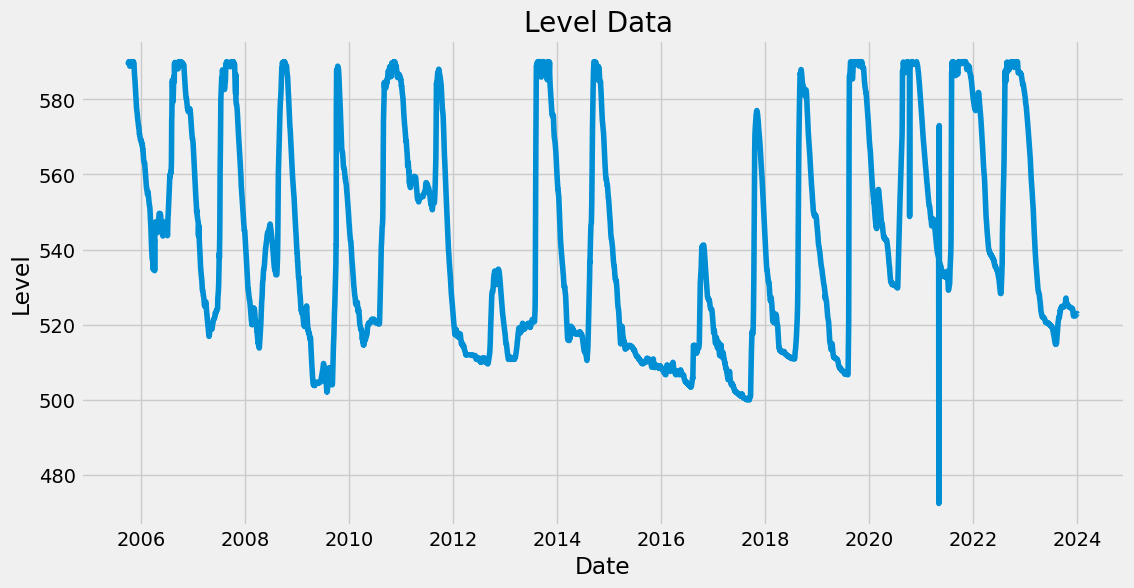

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Level Data ')
plt.plot(df['Level'])
plt.xlabel('Date')
plt.ylabel('Level')
plt.show()

In [ ]:
data = df.filter(['Level'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

5276

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [1.        ],
       [0.99659748],
       ...,
       [0.42922763],
       [0.43007826],
       [0.42922763]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train= []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60 : i,0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()


[array([1.        , 1.        , 0.99659748, 0.99659748, 0.99744811,
       0.99659748, 1.        , 1.        , 1.        , 0.99829874,
       0.99829874, 0.99659748, 0.99234433, 0.98979245, 0.99489622,
       0.99829874, 0.99319496, 0.99659748, 1.        , 1.        ,
       0.99829874, 1.        , 0.99744811, 0.99659748, 0.99914937,
       1.        , 0.99829874, 0.99829874, 1.        , 0.99829874,
       0.99744811, 0.99914937, 1.        , 1.        , 1.        ,
       0.99829874, 1.        , 0.99744811, 0.99829874, 0.99744811,
       0.99829874, 0.99744811, 0.99489622, 0.98724056, 0.98213678,
       0.97448112, 0.96852671, 0.96512419, 0.96087104, 0.95746853,
       0.95151412, 0.94555971, 0.93960531, 0.9336509 , 0.9276965 ,
       0.92089146, 0.91578768, 0.91068391, 0.90558013, 0.90047635])]
[0.8953725757060234]



In [ ]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:

x_train.shape


(5216, 60)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5216, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

5216/5216 [==============================] - 181s 34ms/step - loss: 0.0014


In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

42/42 [==============================] - 2s 17ms/step


In [ ]:
rsme = np.sqrt(np.mean(predictions- y_test)**2)
rsme

0.7268322001849384

<ipython-input-94-8a6c4bbf4e84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']= predictions


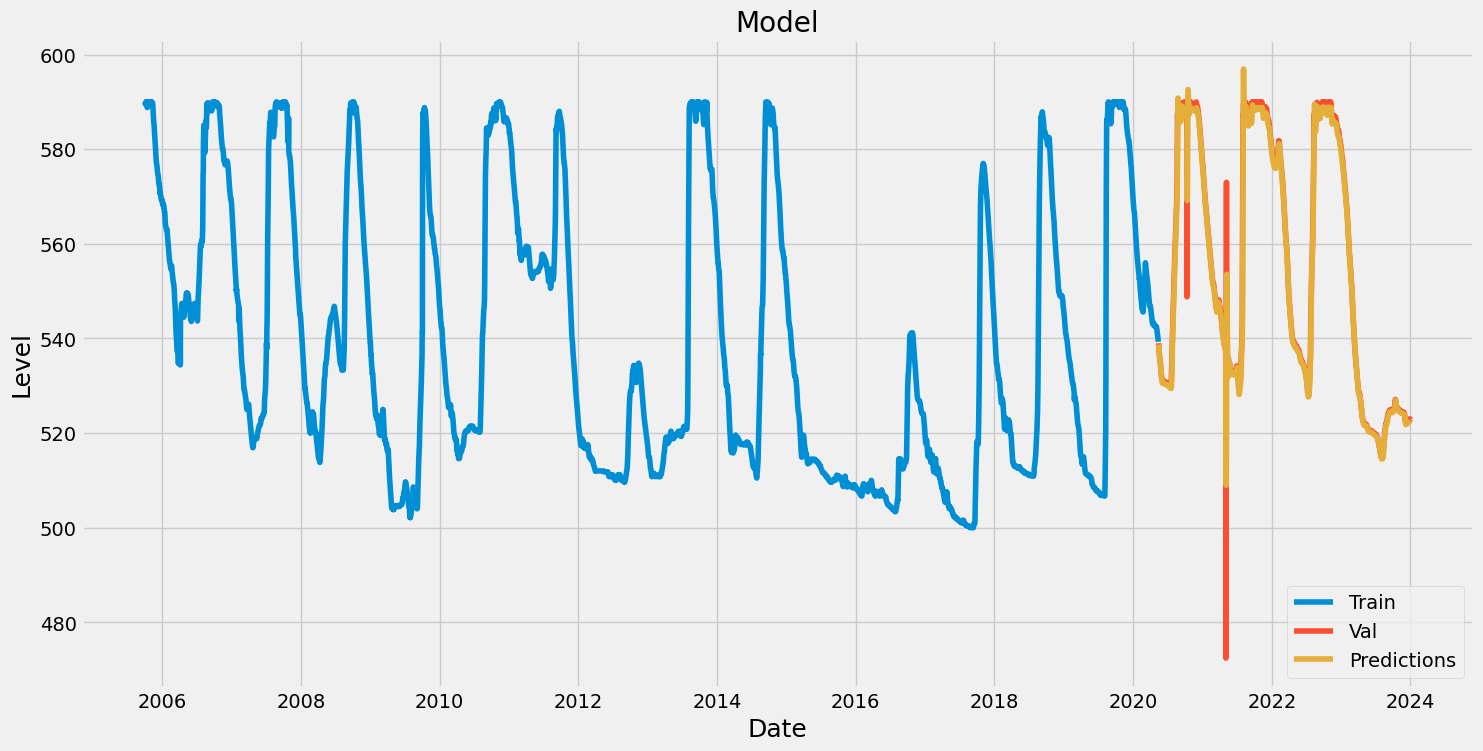

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')`
plt.xlabel('Date',fontsize=18)
plt.ylabel('Level',fontsize=18)
plt.plot(train['Level'])
plt.plot(valid[['Level','predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid

,Level,predictions
Date,,
2020-05-14,539.0,538.751038
2020-05-15,538.6,538.377686
2020-05-16,538.2,538.017090
2020-05-17,537.6,537.649597
2020-05-18,536.9,537.186646
...,...,...
2023-12-27,522.8,522.534790
2023-12-28,522.9,522.533691
2023-12-29,522.9,522.556824


In [ ]:
# Assuming 'model' is already trained and 'data' contains the entire dataset including both training and validation data

# First, we need to prepare the data for prediction
# Get the last 60 data points from the dataset as input for prediction
last_60_days = data[-60:].values
# Scale the last 60 days data
last_60_days_scaled = scaler.transform(last_60_days)
# Reshape the data to match the input shape of the model
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now, make predictions using the model
predicted_level = model.predict(X_test)
# Inverse transform the predicted value to get it back to original scale
predicted_level = scaler.inverse_transform(predicted_level)

# Print the predicted level
print("Predicted Level for the next day:", predicted_level[0][0])


1/1 [==============================] - 0s 36ms/step
Predicted Level for the next day: 522.6475
